# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES
import numpy as np
from qiskit import QuantumCircuit, transpile

basis = 'sto-3g'

In [3]:
bond_lengths = np.linspace(0.2,3.5,15)

# $$H_4$$

In [4]:
#Running FCI
FCI_PES_h4 = obtain_PES('h4', bond_lengths, basis, method='fci')

converged SCF energy = 6.9753973149844
E = 6.845807485143147 Eh
converged SCF energy = 0.0932315753802087
E = -0.051847852652365134 Eh
converged SCF energy = -1.29511035630858
E = -1.4633269875466333 Eh
converged SCF energy = -1.65135854130097
E = -1.8530154689854976 Eh
converged SCF energy = -1.71088406614524
E = -1.9604458445103798 Eh
converged SCF energy = -1.66624189641683
E = -1.9667075542242052 Eh
converged SCF energy = -1.58693222335353
E = -1.9411219628056853 Eh
converged SCF energy = -1.50259197117932
E = -1.9124203260895474 Eh
converged SCF energy = -1.42629159426551
E = -1.8911979669650822 Eh
converged SCF energy = -1.36295544931224
E = -1.8785618290338568 Eh
converged SCF energy = -1.31315471848899
E = -1.8719778908800584 Eh
converged SCF energy = -1.2753750819586
E = -1.8688149736048398 Eh
converged SCF energy = -1.24736931216182
E = -1.8673769023374698 Eh
converged SCF energy = -1.22683001518096
E = -1.8667527179841308 Eh
converged SCF energy = -1.21171082273811
E = -1.86

In [5]:
#Running HF
HF_PES_h4 = obtain_PES('h4', bond_lengths, basis,  method='hf')

converged SCF energy = 6.9753973149844
E = 6.97539731498444 Eh
converged SCF energy = 0.0932315753802087
E = 0.09323157538020244 Eh
converged SCF energy = -1.29511035630858
E = -1.295110356308582 Eh
converged SCF energy = -1.65135854130097
E = -1.6513585413009704 Eh
converged SCF energy = -1.71088406614524
E = -1.71088406614526 Eh
converged SCF energy = -1.66624189641683
E = -1.6662418964185854 Eh
converged SCF energy = -1.58693222335353
E = -1.5869322233686822 Eh
converged SCF energy = -1.50259197117933
E = -1.5025919711979774 Eh
converged SCF energy = -1.42629159426551
E = -1.4262915942655088 Eh
converged SCF energy = -1.36295544931224
E = -1.36295544932004 Eh
converged SCF energy = -1.31315471848899
E = -1.3131547184889927 Eh
converged SCF energy = -1.2753750819586
E = -1.2753750819585963 Eh
converged SCF energy = -1.24736931216183
E = -1.2473693121618368 Eh
converged SCF energy = -1.22683001518096
E = -1.2268300151815295 Eh
converged SCF energy = -1.21171082273811
E = -1.2117108227

In [6]:
#Running CCSD
CCSD_PES_h4 = obtain_PES('h4', bond_lengths, basis,  method='ccsd')

converged SCF energy = 6.9753973149844
E = 6.938630615769992 Eh
converged SCF energy = 0.0932315753802087
E = 0.06513055250474559 Eh
converged SCF energy = -1.29511035630858
E = -1.3168940886770362 Eh
converged SCF energy = -1.65135854130097
E = -1.6969906776090737 Eh
converged SCF energy = -1.71088406614524
E = -1.7846923972276005 Eh
converged SCF energy = -1.66624189641683
E = -1.7786282140941458 Eh
converged SCF energy = -1.58693222335353
E = -1.7594385299333588 Eh
converged SCF energy = -1.50259197117933
E = -1.7631133298050525 Eh
converged SCF energy = -1.42629159426551
E = -1.787329815507324 Eh
converged SCF energy = -1.36295544931224
E = -1.8139032711083969 Eh
converged SCF energy = -1.31315471848899
E = -1.8341101489391534 Eh
converged SCF energy = -1.2753750819586
E = -1.847404439777939 Eh
converged SCF energy = -1.24736931216183
E = -1.8555453271864362 Eh
converged SCF energy = -1.22683001518096
E = -1.8603141184397776 Eh
converged SCF energy = -1.21171082273811
E = -1.863022

In [7]:
#Running FCI
FCI_PES_n2 = obtain_PES('n2', bond_lengths, basis, method='fci')

converged SCF energy = -52.6419222048249
E = -52.75986787780627 Eh
converged SCF energy = -97.0966908319791
E = -97.12990765160126 Eh
converged SCF energy = -105.284636203092
E = -105.34713753955796 Eh
converged SCF energy = -107.211096799925
E = -107.31834406387006 Eh
converged SCF energy = -107.500385885958
E = -107.67103242234845 Eh
converged SCF energy = -107.375223000831
E = -107.63162814020929 Eh
converged SCF energy = -107.172407513618
E = -107.53681792652245 Eh
converged SCF energy = -106.97851794204
E = -107.47384132701 Eh
converged SCF energy = -106.817019806344
E = -107.44934981866669 Eh
converged SCF energy = -106.691338382574
E = -107.44230695031382 Eh
converged SCF energy = -106.596417982585
E = -107.44001881274288 Eh
converged SCF energy = -106.525929061984
E = -107.43877220299181 Eh
converged SCF energy = -106.47445114605
E = -107.43832704415432 Eh
converged SCF energy = -106.437200658906
E = -107.43817681391778 Eh
converged SCF energy = -106.410014865765
E = -107.43808

In [8]:
#Running HF
HF_PES_n2 = obtain_PES('n2', bond_lengths, basis,  method='hf')

converged SCF energy = -52.6419222048249
E = -52.64192220482491 Eh
converged SCF energy = -97.0966908319792
E = -97.0966908319792 Eh
converged SCF energy = -105.284636203092
E = -105.28463620309242 Eh
converged SCF energy = -107.211096799925
E = -107.21109679992531 Eh
converged SCF energy = -107.500385885958
E = -107.50038588595807 Eh
converged SCF energy = -107.375223000832
E = -107.3752230008315 Eh
converged SCF energy = -107.172407513618
E = -107.17240751361844 Eh
converged SCF energy = -106.97851794204
E = -106.97851794204004 Eh
converged SCF energy = -106.817019806344
E = -106.81701980634392 Eh
converged SCF energy = -106.691338382574
E = -106.69133838257429 Eh
converged SCF energy = -106.596417982585
E = -106.59641798258507 Eh
converged SCF energy = -106.525929061984
E = -106.52592906198363 Eh
converged SCF energy = -106.47445114605
E = -106.47445114604996 Eh
converged SCF energy = -106.437200658906
E = -106.43720065890595 Eh
converged SCF energy = -106.410014865765
E = -106.4100

In [9]:
#Running CCSD
CCSD_PES_n2 = obtain_PES('n2', bond_lengths, basis,  method='ccsd')

converged SCF energy = -52.6419222048247
E = -52.69447054010006 Eh
converged SCF energy = -97.0966908319791
E = -97.12970325083754 Eh
converged SCF energy = -105.284636203092
E = -105.34648201207533 Eh
converged SCF energy = -107.211096799925
E = -107.31659371781373 Eh
converged SCF energy = -107.500385885958
E = -107.66634536413453 Eh
converged SCF energy = -107.375223000832
E = -107.62073222804094 Eh
converged SCF energy = -107.172407513618
E = -107.52475097021139 Eh
converged SCF energy = -106.97851794204
E = -107.51163292268701 Eh
converged SCF energy = -106.817019806344
E = -107.02812380030028 Eh
converged SCF energy = -106.691338382574
E = -106.9553216889339 Eh
converged SCF energy = -106.596417982585
E = -107.1210381506665 Eh
converged SCF energy = -106.525929061984
E = -106.90651414338267 Eh
converged SCF energy = -106.47445114605
E = -106.99318229661938 Eh
converged SCF energy = -106.437200658906
E = -106.85769782711485 Eh
converged SCF energy = -106.410014865765
E = -106.6717

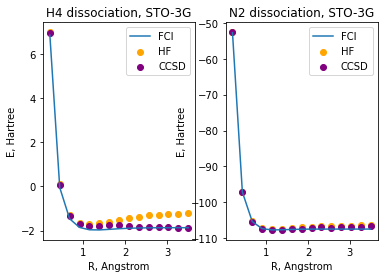

In [10]:
# Plotting H4 and N2 PESs
f, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('H4 dissociation, STO-3G')
ax1.set_xlabel('R, Angstrom')
ax1.set_ylabel('E, Hartree')

ax1.plot(bond_lengths, FCI_PES_h4, label='FCI')
ax1.scatter(bond_lengths, HF_PES_h4, label='HF', color='orange')
ax1.scatter(bond_lengths, CCSD_PES_h4, label='CCSD', color='purple')
ax1.legend()

ax2.set_title('N2 dissociation, STO-3G')
ax2.set_xlabel('R, Angstrom')
ax2.set_ylabel('E, Hartree')

ax2.plot(bond_lengths, FCI_PES_n2, label='FCI')
ax2.scatter(bond_lengths, HF_PES_n2, label='HF', color='orange')
ax2.scatter(bond_lengths, CCSD_PES_n2, label='CCSD', color='purple')
ax2.legend()



### The CCSD method does not seem that bad in comparision (for minimal atomic basis), it seems almost as accurate with FCI.